In [2]:
pip install xgboost==1.7.6


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import ast
import os

In [4]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks


In [5]:
tracks = load("../../fma_metadata/tracks.csv")

In [6]:
features = load("../../fma_metadata/features.csv")

In [14]:
track_genre = pd.DataFrame(tracks['track','genre_top'])

In [15]:
track_genre.columns = pd.MultiIndex.from_tuples([("","","genre_top")])

In [16]:
track_genre

,
,
,genre_top
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN
...,...
155316,Rock


In [17]:
selected_track_genres = track_genre[track_genre['','','genre_top'].isin(["Rock","Electronic","Pop","Hip-Hop","Folk"])]

In [19]:
merged_data = track_genre.merge(features,left_index=True,right_index=True)

In [20]:
merged_data.dropna(inplace=True)

In [21]:
merged_data= merged_data.reset_index().set_index(["track_id",('','','genre_top')])

In [22]:
merged_data.index.rename(["track_id","genre_top"],inplace=True)

In [23]:
merged_data.reset_index(1,inplace=True)

In [24]:
merged_data

genre_top chroma_cens                                          \
                      kurtosis                                           
                            01        02        03        04        05   
track_id                                                                 
2          Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3          Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5          Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10             Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134        Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   
...            ...         ...       ...       ...       ...       ...   
155315        Rock   -0.319850  0.653044  1.300360 -0.606061 -1.109302   
155316        Rock   -0.490129  0.463834  2.321970 -0.084352  1.662914   
155317        Rock   -0.461559 -0.229601 -0.496632 -0.422033  0.130612   
155318        Rock    0.552473 -0.110498 -0.532014  0.263131 -0.224011   
155319        Rock   -0.176901  0.187208 -0.050664  0.368843  0.066005   

                                                  ...   tonnetz            \
                                                  ...       std             
                06        07        08        09  ...        04        05   
track_id                                          ...                       
2         0.531371  1.481593  2.691455  0.866868  ...  0.054125  0.012226   
3         0.067592  1.366848  1.054094  0.108103  ...  0.063831  0.014212   
5         0.880839 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691   
10        0.998411  1.770694  1.604566  0.521217  ...  0.074358  0.017952   
134       0.078177  1.199204 -0.175223  0.925482  ...  0.058766  0.016322   
...            ...       ...       ...       ...  ...       ...       ...   
155315   -1.006683  0.059643  0.472580 -0.856436  ...  0.108577  0.016631   
155316    2.115189 -0.237794  5.695442  0.830353  ...  0.128410  0.022547   
155317   -0.263825 -0.628103 -0.082687 -0.229483  ...  0.132964  0.023548   
155318   -0.530972  1.713526  1.418444  1.325197  ...  0.108324  0.017540   
155319   -0.857354 -0.780860  0.626281 -0.630938  ...  0.088311  0.018328   

                          zcr                                          \
                     kurtosis       max      mean    median       min   
                06         01        01        01        01        01   
track_id                                                                
2         0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3         0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5         0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10        0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
134       0.015819   4.731087  0.419434  0.064370  0.050781  0.000000   
...            ...        ...       ...       ...       ...       ...   
155315    0.014705   6.947788  0.188477  0.037708  0.035156  0.002930   
155316    0.019816   4.448255  0.172852  0.028773  0.028320  0.003906   
155317    0.026527   3.270612  0.196289  0.031116  0.027832  0.002441   
155318    0.020471   2.356727  0.212891  0.038450  0.037109  0.003418   
155319    0.017936   6.188604  0.167480  0.041480  0.038086  0.004883   

                              
              skew       std  
                01        01  
track_id                      
2         2.089872  0.061448  
3         1.716724  0.069330  
5         2.193303  0.044861  
10        3.542325  0.040800  
134       1.806106  0.054623  
...            ...       ...  
155315    1.764233  0.018679  
155316    0.955388  0.012385  
155317    1.283060  0.019059  
155318    0.828569  0.017904  
155319    1.818740  0.020133  

[49598 rows x 519 columns]

In [26]:
selected_merged_data = merged_data[merged_data["genre_top"].isin(["Rock","Electronic","Pop","Hip-Hop","Folk"])]

In [27]:
selected_merged_data['genre_top'] = selected_merged_data['genre_top'].astype(object)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_49579/2834995332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_data['genre_top'] = selected_merged_data['genre_top'].astype(object)


In [28]:
selected_merged_data['genre_top'].value_counts()

genre_top
Rock          14182
Electronic     9372
Hip-Hop        3552
Folk           2803
Pop            2332
Name: count, dtype: int64

In [29]:
selected_merged_data

genre_top chroma_cens                                          \
                      kurtosis                                           
                            01        02        03        04        05   
track_id                                                                 
2          Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3          Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5          Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10             Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134        Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   
...            ...         ...       ...       ...       ...       ...   
155315        Rock   -0.319850  0.653044  1.300360 -0.606061 -1.109302   
155316        Rock   -0.490129  0.463834  2.321970 -0.084352  1.662914   
155317        Rock   -0.461559 -0.229601 -0.496632 -0.422033  0.130612   
155318        Rock    0.552473 -0.110498 -0.532014  0.263131 -0.224011   
155319        Rock   -0.176901  0.187208 -0.050664  0.368843  0.066005   

                                                  ...   tonnetz            \
                                                  ...       std             
                06        07        08        09  ...        04        05   
track_id                                          ...                       
2         0.531371  1.481593  2.691455  0.866868  ...  0.054125  0.012226   
3         0.067592  1.366848  1.054094  0.108103  ...  0.063831  0.014212   
5         0.880839 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691   
10        0.998411  1.770694  1.604566  0.521217  ...  0.074358  0.017952   
134       0.078177  1.199204 -0.175223  0.925482  ...  0.058766  0.016322   
...            ...       ...       ...       ...  ...       ...       ...   
155315   -1.006683  0.059643  0.472580 -0.856436  ...  0.108577  0.016631   
155316    2.115189 -0.237794  5.695442  0.830353  ...  0.128410  0.022547   
155317   -0.263825 -0.628103 -0.082687 -0.229483  ...  0.132964  0.023548   
155318   -0.530972  1.713526  1.418444  1.325197  ...  0.108324  0.017540   
155319   -0.857354 -0.780860  0.626281 -0.630938  ...  0.088311  0.018328   

                          zcr                                          \
                     kurtosis       max      mean    median       min   
                06         01        01        01        01        01   
track_id                                                                
2         0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3         0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5         0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10        0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
134       0.015819   4.731087  0.419434  0.064370  0.050781  0.000000   
...            ...        ...       ...       ...       ...       ...   
155315    0.014705   6.947788  0.188477  0.037708  0.035156  0.002930   
155316    0.019816   4.448255  0.172852  0.028773  0.028320  0.003906   
155317    0.026527   3.270612  0.196289  0.031116  0.027832  0.002441   
155318    0.020471   2.356727  0.212891  0.038450  0.037109  0.003418   
155319    0.017936   6.188604  0.167480  0.041480  0.038086  0.004883   

                              
              skew       std  
                01        01  
track_id                      
2         2.089872  0.061448  
3         1.716724  0.069330  
5         2.193303  0.044861  
10        3.542325  0.040800  
134       1.806106  0.054623  
...            ...       ...  
155315    1.764233  0.018679  
155316    0.955388  0.012385  
155317    1.283060  0.019059  
155318    0.828569  0.017904  
155319    1.818740  0.020133  

[32241 rows x 519 columns]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [31]:
dictG = {"Rock":0,"Electronic":1,"Pop":2,"Hip-Hop":3,"Folk":4}

In [32]:
X = selected_merged_data.drop(["genre_top"],axis=1)
y = selected_merged_data['genre_top'].replace(dictG)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_49579/41724156.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = selected_merged_data.drop(["genre_top"],axis=1)
/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_49579/41724156.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = selected_merged_data['genre_top'].replace(dictG)


In [34]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [64]:
model = XGBClassifier()

In [66]:
model.fit(x_train,y_train,eval_set=[(x_train, y_train),(x_val, y_val)])

[0]	validation_0-mlogloss:1.29328	validation_1-mlogloss:1.31505
[1]	validation_0-mlogloss:1.10892	validation_1-mlogloss:1.15387
[2]	validation_0-mlogloss:0.98284	validation_1-mlogloss:1.04629
[3]	validation_0-mlogloss:0.89041	validation_1-mlogloss:0.97181
[4]	validation_0-mlogloss:0.81464	validation_1-mlogloss:0.91345
[5]	validation_0-mlogloss:0.75515	validation_1-mlogloss:0.87038
[6]	validation_0-mlogloss:0.70525	validation_1-mlogloss:0.83643
[7]	validation_0-mlogloss:0.66280	validation_1-mlogloss:0.80843
[8]	validation_0-mlogloss:0.62575	validation_1-mlogloss:0.78676
[9]	validation_0-mlogloss:0.59353	validation_1-mlogloss:0.76930
[10]	validation_0-mlogloss:0.56560	validation_1-mlogloss:0.75346
[11]	validation_0-mlogloss:0.53885	validation_1-mlogloss:0.74204
[12]	validation_0-mlogloss:0.51374	validation_1-mlogloss:0.73090
[13]	validation_0-mlogloss:0.49265	validation_1-mlogloss:0.72029
[14]	validation_0-mlogloss:0.47289	validation_1-mlogloss:0.71285
[15]	validation_0-mlogloss:0.45481	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [67]:
y_pred_train = model.predict(x_train)

In [68]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9902
           1       1.00      1.00      1.00      6603
           2       0.99      1.00      0.99      1645
           3       1.00      1.00      1.00      2450
           4       1.00      1.00      1.00      1968

    accuracy                           1.00     22568
   macro avg       1.00      1.00      1.00     22568
weighted avg       1.00      1.00      1.00     22568



In [69]:
y_pred_val = model.predict(x_val)

In [70]:
print(classification_report(y_pred_val,y_val))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2348
           1       0.83      0.74      0.78      1560
           2       0.14      0.40      0.20       118
           3       0.65      0.81      0.72       438
           4       0.67      0.75      0.70       372

    accuracy                           0.78      4836
   macro avg       0.64      0.70      0.65      4836
weighted avg       0.82      0.78      0.80      4836



In [71]:
y_pred = model.predict(x_test)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2147
           1       0.74      0.84      0.79      1381
           2       0.49      0.14      0.22       340
           3       0.82      0.67      0.73       551
           4       0.72      0.62      0.67       418

    accuracy                           0.77      4837
   macro avg       0.72      0.63      0.65      4837
weighted avg       0.76      0.77      0.76      4837



In [73]:
evals_result = model.evals_result()

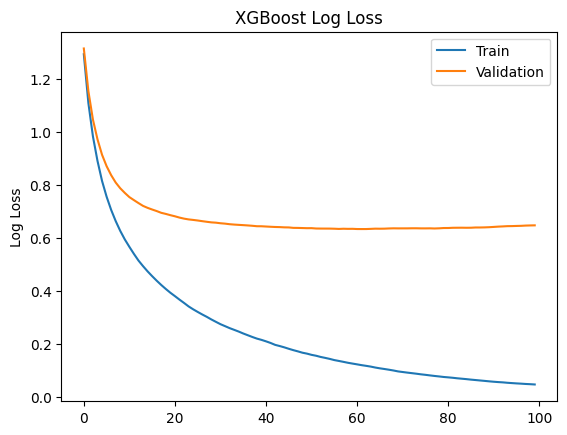

In [74]:
import matplotlib.pyplot as plt
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Validation')
plt.legend(); plt.ylabel('Log Loss'); plt.title('XGBoost Log Loss'); plt.show()

In [89]:
y_all = model.predict_proba(X)

In [102]:
base_data_prob_over = pd.DataFrame(y_all,index=X.index,columns=["Rock","Electronic","Pop","Hip-Hop","Folk"])

In [104]:
base_data_prob_over.to_csv("base_data_prob_overfitting.csv")

In [109]:
# central_cee_hiphop = pd.read_csv("central_cee_hiphop.csv",index_col=[0],header=[0,1,2])

In [113]:
# central_cee_hiphop.drop('mel_spec',axis=1,inplace=True)

In [115]:
# central_cee_hiphop_prob = model.predict_proba(central_cee_hiphop)

In [121]:
# pd.DataFrame(central_cee_hiphop_prob).to_csv("central_cee_hiphop_prob.csv")